<a href="https://colab.research.google.com/github/pathilink/alura_time_series/blob/main/notebook/2_newsletter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Newsletter

## Libraries

In [21]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

## Data

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df_news = pd.read_csv("drive/MyDrive/Alura/Time Series/newsletter_alucar.csv")
df_news.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [24]:
# Rename columns

df_news.rename(columns={'mes': 'month', 'assinantes': 'subscribers'}, inplace=True)

In [25]:
print(f'Shape: {df_news.shape[0]} rows and {df_news.shape[1]} columns.')

Shape: 24 rows and 2 columns.


In [26]:
print('Number of null data per column:')
df_news.isna().sum()

Number of null data per column:


month          0
subscribers    0
dtype: int64

In [27]:
print('Variable types:') 
df_news.dtypes

Variable types:


month          object
subscribers     int64
dtype: object

In [28]:
# Convert object column to datetime

df_news['month'] = pd.to_datetime(df_news['month'])
df_news.dtypes

month          datetime64[ns]
subscribers             int64
dtype: object

### Decomposing

In [29]:
df_news['increase'] = df_news['subscribers'].diff()
df_news['acceleration'] = df_news['increase'].diff()
df_news.head()

,month,subscribers,increase,acceleration
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [30]:
def plot_comparison(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

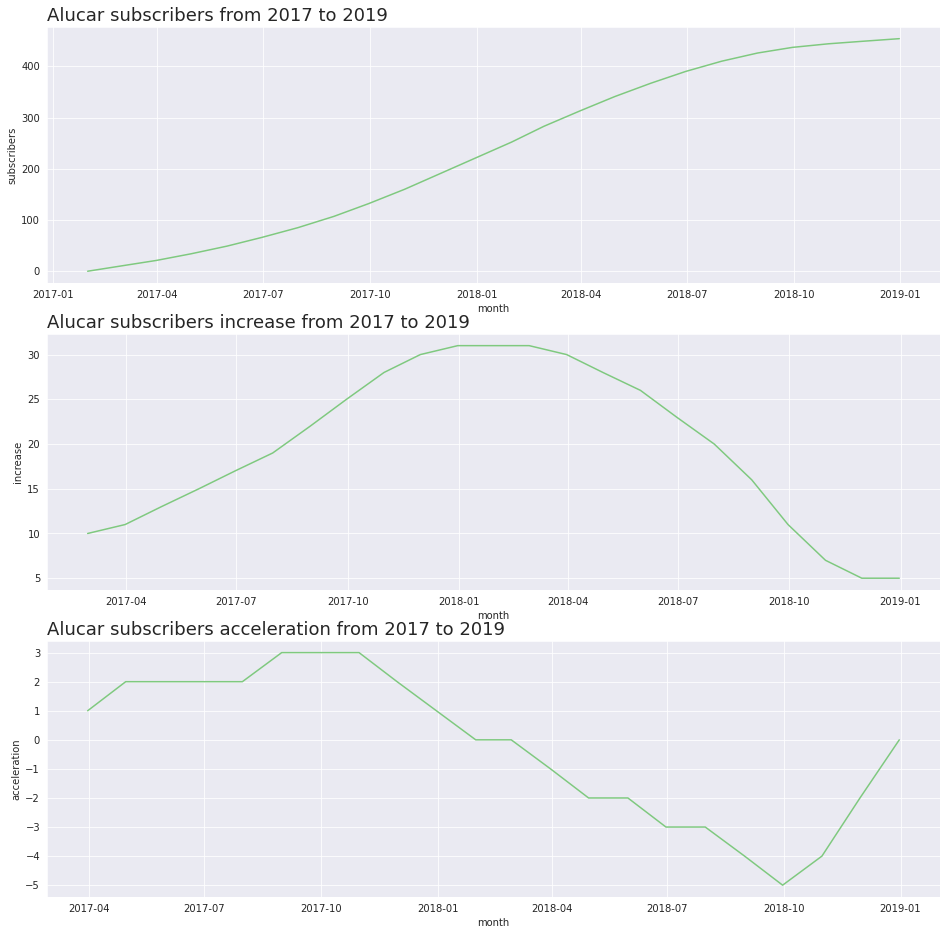

In [31]:
plot_comparison(
    'month', 
    'subscribers', 
    'increase', 
    'acceleration', 
    df_news, 
    'Alucar subscribers from 2017 to 2019',
    'Alucar subscribers increase from 2017 to 2019',
    'Alucar subscribers acceleration from 2017 to 2019'
    )